# One weird trick to always get hypothesis testing right

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size':16})

## Step 1: State the null hypothesis. 
- What would the data look like if there were "nothing interesting going on"?
- Pick something to compute that seems like it would be the same for each group if there is "nothing interesting going on".

In [8]:
from scipy.stats import expon
n = 25
df = pd.DataFrame(data=expon.rvs(scale=10,size=(n,2)),
                  columns=['Control','Magic'])
df['Magic'] += 25
df.head()

,Control,Magic
0,8.861331,26.727503
1,33.211930,32.134370
2,47.224907,25.349699
3,0.477726,36.184993
4,34.262584,62.892220


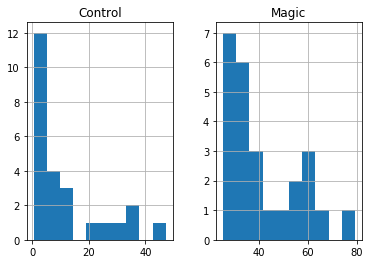

In [9]:
df.hist();

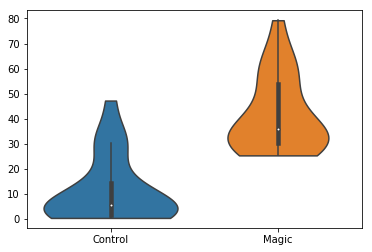

In [10]:
import seaborn as sns
sns.violinplot(data=df,cut=0)

In [11]:
print('Control mean = %.1f' % df['Control'].mean())
print('Magic mean = %.1f' % df['Magic'].mean())
difference = df['Magic'].mean() - df['Control'].mean()
print("Difference in means = %.1f" % difference)

Control mean = 11.3
Magic mean = 41.6
Difference in means = 30.4


## Step 2: Simulate what the data would look like if the null hypothesis were true and you had the chance to observe it many times

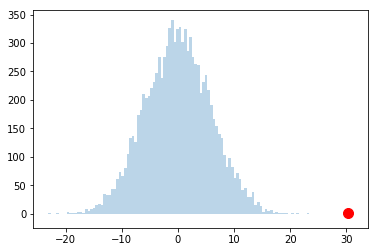

In [12]:
all_data = np.concatenate((df['Control'],df['Magic']))
n_iterations = 10000
fake_differences = np.empty(n_iterations)
for i in range(n_iterations):
    fake_control = np.random.choice(all_data,size=n)
    fake_magic = np.random.choice(all_data,size=n)
    fake_differences[i] = fake_magic.mean() - fake_control.mean()
plt.hist(fake_differences,bins=100,alpha=0.3);
plt.scatter(difference,1,s=100,c='red');

## Step 3: Compare the real test statistic to the distribution of that test statistic in the null hypothesis simulation

In [13]:
false_positive = fake_differences > difference
false_positive

array([False, False, False, ..., False, False, False], dtype=bool)

In [14]:
p = false_positive.sum()/n_iterations
print('The p-value is %.4f' % p)

The p-value is 0.0000
